In [1]:
import random as rd
import pandas as pd
import numpy as np

In [2]:
data =pd.read_csv("Boston (1).csv")

In [3]:
df=pd.DataFrame(data)
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# veri seti inceleme
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


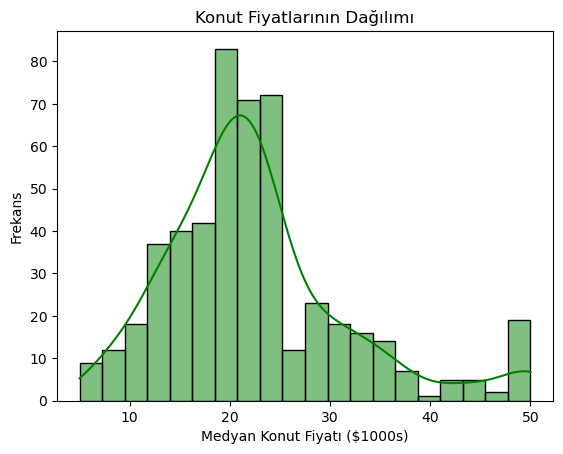

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['MEDV'], bins=20, kde=True, color='green')
plt.title('Konut Fiyatlarının Dağılımı')
plt.xlabel('Medyan Konut Fiyatı ($1000s)')
plt.ylabel('Frekans')
plt.show()

In [7]:
#split data
x=df.drop(columns=["MEDV"])
y=df["MEDV"]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2529)

In [9]:
# ağırlıklar
w_init = np.random.rand(len(x.keys()))
w_init

array([0.41985264, 0.50231452, 0.29450582, 0.52344059, 0.9312824 ,
       0.08708126, 0.13443807, 0.69505782, 0.81051421, 0.92642489,
       0.04995825, 0.94496762, 0.81133847])

In [10]:
# bias
b_init = rd.random()
b_init

0.030908663935225178

### tahmin yapma

In [11]:
def predict(x,w,b):
    return np.dot(x,w)+b

In [12]:
def compute_cost(x_train, y_train, w, b):
    m = x_train.shape[0]
    predictions = predict(x_train, w, b)
    error = predictions - y_train
    cost = np.sum(error**2) / (2 * m)
    return cost

In [13]:
def compute_gradients(x_train, y_train, w, b):
    m = x_train.shape[0]
    dw = np.zeros_like(w)
    db = 0
    
    for i in range(m):
        x_i = x_train.iloc[i].values.reshape(1, -1)  
        y_i = y_train.iloc[i]
        
        prediction = predict(x_i, w, b) 
        error = prediction - y_i
        
        dw += np.dot(x_i.T, error)
        db += error
        
    dw /= m
    db /= m
    
    return dw, db


In [14]:
def gradient_descent(x_train, y_train, w, b, learning_rate, num_iterations):
    costs = []
    
    for i in range(num_iterations):
        dw, db = compute_gradients(x_train, y_train, w, b)
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
        cost = compute_cost(x_train, y_train, w, b)
        costs.append(cost)
        
        print(f"Iteration {i}: Cost = {cost}")
    
    return w, b, costs


In [15]:
learning_rate = 1e-5
num_iterations = 100

In [16]:
w, b, costs = gradient_descent(x_train, y_train, w_init, b_init, learning_rate, num_iterations)

Iteration 0: Cost = 1269220.3754277488
Iteration 1: Cost = 5723416.826723119
Iteration 2: Cost = 25811042.96676994
Iteration 3: Cost = 116402376.91929477
Iteration 4: Cost = 524951736.20919853
Iteration 5: Cost = 2367430079.876483
Iteration 6: Cost = 10676649878.760637
Iteration 7: Cost = 48149618743.21272
Iteration 8: Cost = 217145436561.4253
Iteration 9: Cost = 979283780679.2861
Iteration 10: Cost = 4416379816972.469
Iteration 11: Cost = 19917015959837.883
Iteration 12: Cost = 89821877010101.36
Iteration 13: Cost = 405079235057680.2
Iteration 14: Cost = 1826828743030769.2
Iteration 15: Cost = 8238643128396045.0
Iteration 16: Cost = 3.715468177080592e+16
Iteration 17: Cost = 1.6756040478702323e+17
Iteration 18: Cost = 7.556649098917078e+17
Iteration 19: Cost = 3.407902104124453e+18
Iteration 20: Cost = 1.5368977173970174e+19
Iteration 21: Cost = 6.9311104649439805e+19
Iteration 22: Cost = 3.125796319004232e+20
Iteration 23: Cost = 1.4096734826717805e+21
Iteration 24: Cost = 6.35735385